In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("trainKNN.txt",header=None,sep=',',
names=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])

In [3]:
train

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [4]:
test=pd.read_csv("testKNN.txt",header=None,sep=',',
names=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])

In [5]:
test

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [6]:
print(train.shape)
print(test.shape)

(196, 11)
(18, 11)


In [7]:
print(train.isna().sum())
print(test.isna().sum())

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64
Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64


In [8]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      196 non-null    int64  
 1   RI             196 non-null    float64
 2   Na             196 non-null    float64
 3   Mg             196 non-null    float64
 4   Al             196 non-null    float64
 5   Si             196 non-null    float64
 6   K              196 non-null    float64
 7   Ca             196 non-null    float64
 8   Ba             196 non-null    float64
 9   Fe             196 non-null    float64
 10  Type of glass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB
None


In [9]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      18 non-null     int64  
 1   RI             18 non-null     float64
 2   Na             18 non-null     float64
 3   Mg             18 non-null     float64
 4   Al             18 non-null     float64
 5   Si             18 non-null     float64
 6   K              18 non-null     float64
 7   Ca             18 non-null     float64
 8   Ba             18 non-null     float64
 9   Fe             18 non-null     float64
 10  Type of glass  18 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 KB
None


In [10]:
features = train.columns[:-1].tolist()
features

['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


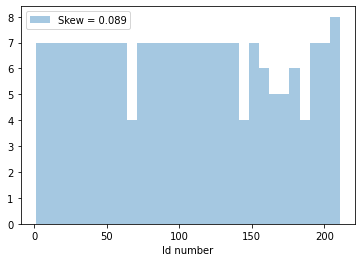

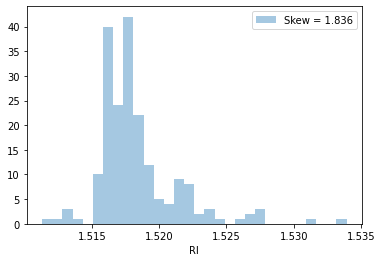

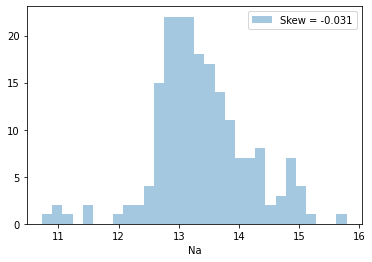

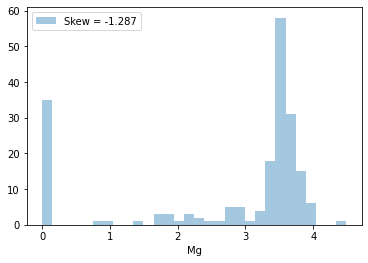

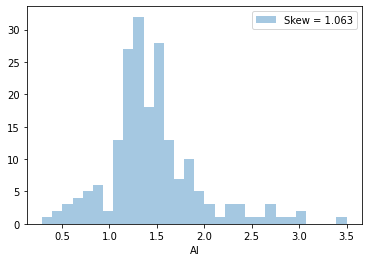

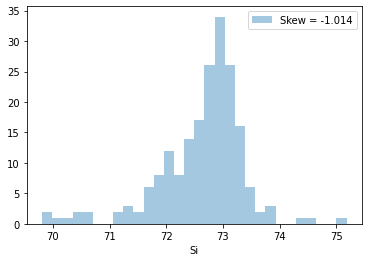

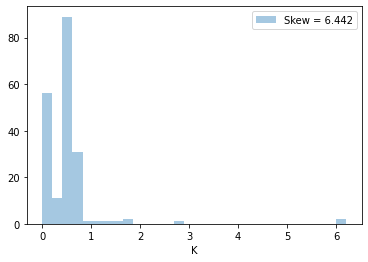

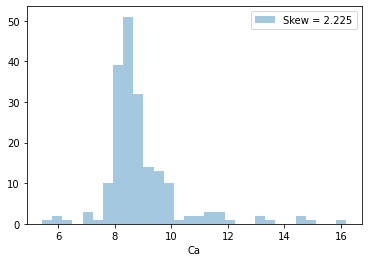

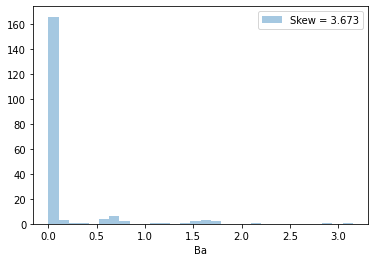

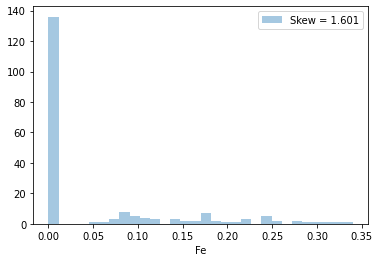

In [13]:
for col in features:
    skew = train[col].skew()
    sns.distplot(train[col],kde=False,label='Skew = %.3f' %(skew),bins=30)
    plt.legend(loc='best')
    plt.show()

C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of glass', ylabel='count'>

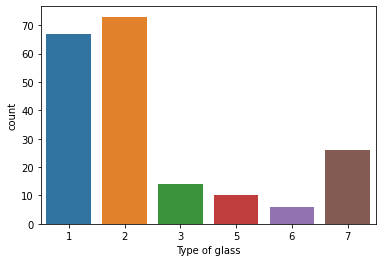

In [14]:
sns.countplot(train['Type of glass'])

In [15]:
x_train = train.drop(columns=['Type of glass',],axis=1)

x_test = test.drop(columns=['Type of glass'],axis=1)


y_train = train['Type of glass']

y_test = test['Type of glass']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Euclidean Metric

In [17]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 

In [18]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='euclidean', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(metric='euclidean')

In [19]:
euclid_pred = classifier.predict(x_test)

In [20]:
euclid_score = accuracy_score(y_test,euclid_pred)
euclid_score = euclid_score*100

print("Accuracy Score of Euclidean Metric ---> ",euclid_score)

Accuracy Score of Euclidean Metric --->  66.66666666666666


In [21]:
classifier.score(x_test,y_test)*100

66.66666666666666

## Manhattan Metric

In [22]:
classifier= KNeighborsClassifier(metric='manhattan')  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(metric='manhattan')

In [23]:
manhat_pred = classifier.predict(x_test)

In [24]:
manhat_score= accuracy_score(y_test,manhat_pred)*100
print("Accuracy score of Manhattan metric ---> ",manhat_score)

Accuracy score of Manhattan metric --->  72.22222222222221


In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,manhat_pred))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.50      1.00      0.67         3
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.72        18
   macro avg       0.83      0.72      0.70        18
weighted avg       0.83      0.72      0.70        18



In [27]:
clf_report = pd.DataFrame(classification_report(y_test, manhat_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")

CLASSIFICATION REPORT:
                  1         2         3         5         6         7  \
precision  0.750000  0.500000  1.000000  1.000000  1.000000  0.750000   
recall     1.000000  1.000000  0.333333  0.666667  0.333333  1.000000   
f1-score   0.857143  0.666667  0.500000  0.800000  0.500000  0.857143   
support    3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   

           accuracy  macro avg  weighted avg  
precision  0.722222   0.833333      0.833333  
recall     0.722222   0.722222      0.722222  
f1-score   0.722222   0.696825      0.696825  
support    0.722222  18.000000     18.000000  


In [28]:
clf_report = pd.DataFrame(classification_report(y_test, euclid_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")

CLASSIFICATION REPORT:
             1         2         3         5         6         7  accuracy  \
precision  1.0  0.375000  1.000000  1.000000  1.000000  0.750000  0.666667   
recall     1.0  1.000000  0.333333  0.333333  0.333333  1.000000  0.666667   
f1-score   1.0  0.545455  0.500000  0.500000  0.500000  0.857143  0.666667   
support    3.0  3.000000  3.000000  3.000000  3.000000  3.000000  0.666667   

           macro avg  weighted avg  
precision   0.854167      0.854167  
recall      0.666667      0.666667  
f1-score    0.650433      0.650433  
support    18.000000     18.000000  
